In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Linear Regression with Polynomial Curve Fitting	


In [7]:
#data loading
df = pd.read_csv('globalTemp.csv')
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()

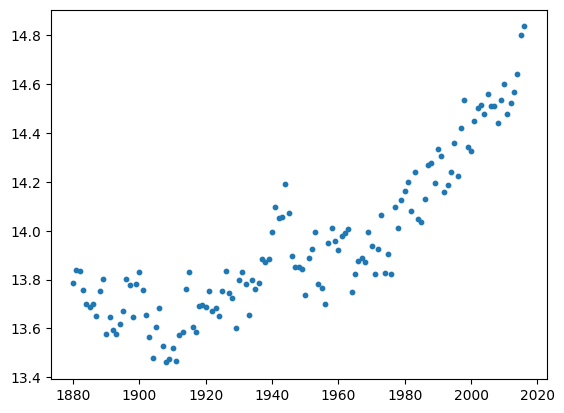

In [3]:
plt.scatter(x, y, s = 10)

In [4]:
# 用二阶多项式去拟合

order = 2 #多项式的阶数
X = np.array([x**i for i in range(order+1)]).T

In [5]:
print(X[0])
print(X.shape)

[      1    1880 3534400]
(137, 3)


Task: implement yourself linear regression using numpy

In [8]:
# 使用正常方程实现线性回归
W = np.linalg.inv(X.T @ X) @ X.T @ y
y_hat = X @ W

Task: implement linear regression using the functions from sklearn

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [9]:
# 使用scikit-learn实现线性回归
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
W_2 = model.coef_
y_hat2 = model.predict(X)

verify your answer with codes below

In [10]:
print("our weight = ", W)
print("sklearn weight = ", W_2)

our weight =  [ 2.96387019e+02 -2.96922880e-01  7.79627646e-05]
sklearn weight =  [ 2.96387019e+02 -2.96922881e-01  7.79627647e-05]


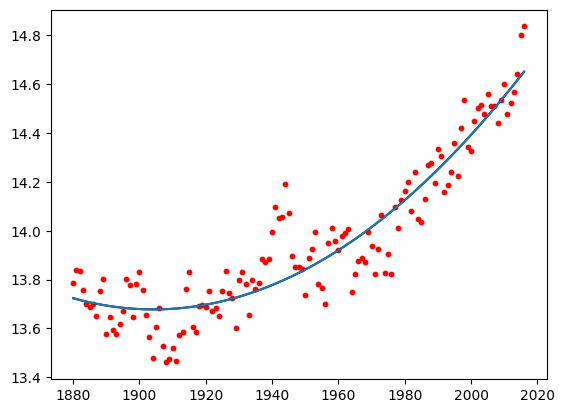

In [13]:
plt.scatter(x, y, s=10, c="r")
plt.plot(x, y_hat,c="k")
plt.plot(x, y_hat2)

## Linear Regression

In [15]:
N_SAMPLES = 500
N_FEATURES = 200
NOISE = 3
data = datasets.make_regression(n_samples=N_SAMPLES, 
                                n_features=N_FEATURES, 
                                n_informative=5, 
                                noise=NOISE, 
                                random_state=9961)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9961)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 200) (350,)
(150, 200) (150,)


Task: use numpy to implement linear regression via the normal equation, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [16]:
# NumPy 实现（正规方程）
# 使用训练集 X_train, y_train 求解权重（不含偏置项）
# 使用伪逆以增强数值稳定性
W_np = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

# 预测
y_train_hat_np = X_train @ W_np
y_test_hat_np = X_test @ W_np

# 评估：MSE
mse_train_np = np.mean((y_train - y_train_hat_np) ** 2)
mse_test_np = np.mean((y_test - y_test_hat_np) ** 2)

# 权重范数
l2_np = np.linalg.norm(W_np, ord=2)
l1_np = np.linalg.norm(W_np, ord=1)

print("NumPy normal equation results:")
print("W shape:", W_np.shape)
print("L2 norm:", l2_np, "L1 norm:", l1_np)
print("MSE train:", mse_train_np, "MSE test:", mse_test_np)

NumPy normal equation results:
W shape: (200,)
L2 norm: 128.1182134772977 L1 norm: 286.7609971067593
MSE train: 4.122237783344367 MSE test: 19.846467666018963


Task: use scikit-learn’s LinearRegression to fit the same model without an intercept, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [17]:
# scikit-learn 实现（用于对比）
model_sk = LinearRegression(fit_intercept=False)
model_sk.fit(X_train, y_train)
W_sk = model_sk.coef_

# 预测
y_train_hat_sk = model_sk.predict(X_train)
y_test_hat_sk = model_sk.predict(X_test)

# 评估：MSE
mse_train_sk = np.mean((y_train - y_train_hat_sk) ** 2)
mse_test_sk = np.mean((y_test - y_test_hat_sk) ** 2)

# 权重范数
l2_sk = np.linalg.norm(W_sk, ord=2)
l1_sk = np.linalg.norm(W_sk, ord=1)

print("sklearn LinearRegression results:")
print("W shape:", W_sk.shape)
print("L2 norm:", l2_sk, "L1 norm:", l1_sk)
print("MSE train:", mse_train_sk, "MSE test:", mse_test_sk)

sklearn LinearRegression results:
W shape: (200,)
L2 norm: 128.1182134772978 L1 norm: 286.7609971067606
MSE train: 4.122237783344365 MSE test: 19.846467666018818


## Ridge Regression

Task: use numpy to implement ridge regression with various values of regularization strength via the closed-form solution, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

lambda=0.001: L2=128.117, MSE_train=4.12224, MSE_test=19.8443
lambda=0.003162: L2=128.116, MSE_train=4.12224, MSE_test=19.8397
lambda=0.01: L2=128.11, MSE_train=4.12227, MSE_test=19.8253
lambda=0.03162: L2=128.092, MSE_train=4.12254, MSE_test=19.7806
lambda=0.1: L2=128.036, MSE_train=4.12526, MSE_test=19.6491
lambda=0.3162: L2=127.858, MSE_train=4.15225, MSE_test=19.3291
lambda=1: L2=127.306, MSE_train=4.41655, MSE_test=19.2392
lambda=3.162: L2=125.644, MSE_train=6.89793, MSE_test=27.0938
lambda=10: L2=121.06, MSE_train=27.7303, MSE_test=108.536
lambda=31.62: L2=110.484, MSE_train=166.968, MSE_test=581.367
lambda=100: L2=91.2044, MSE_train=845.026, MSE_test=2144.16
lambda=316.2: L2=63.5232, MSE_train=3114.18, MSE_test=5294.98
lambda=1000: L2=34.6275, MSE_train=7590.02, MSE_test=9374.21


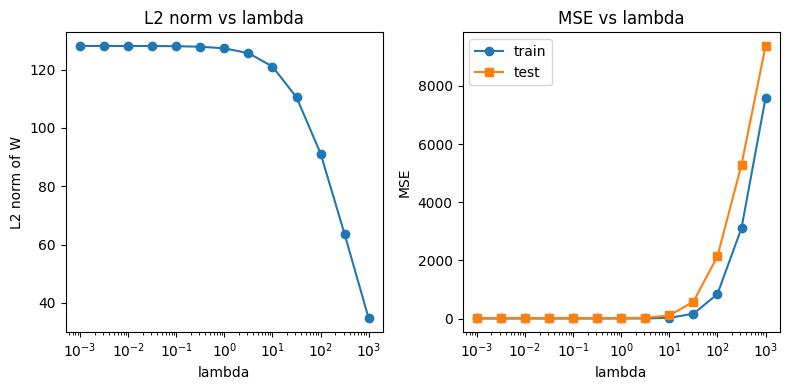

In [19]:
# NumPy 实现 Ridge 回归（闭式解）
import matplotlib.pyplot as plt

lambdas = np.logspace(-3, 3, 13)  # 从 1e-3 到 1e3
l2_norms = []
mse_train_list = []
mse_test_list = []

n_features = X_train.shape[1]
I = np.eye(n_features)

for lam in lambdas:
    A = X_train.T @ X_train + lam * I
    b = X_train.T @ y_train
    try:
        W_ridge = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        W_ridge = np.linalg.pinv(A) @ b

    # 预测
    y_train_hat = X_train @ W_ridge
    y_test_hat = X_test @ W_ridge

    # 评估
    mse_train = np.mean((y_train - y_train_hat) ** 2)
    mse_test = np.mean((y_test - y_test_hat) ** 2)

    # 范数
    l2 = np.linalg.norm(W_ridge, ord=2)

    l2_norms.append(l2)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

    print(f"lambda={lam:.4g}: L2={l2:.6g}, MSE_train={mse_train:.6g}, MSE_test={mse_test:.6g}")

# 绘图对比
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.semilogx(lambdas, l2_norms, marker='o')
plt.xlabel('lambda')
plt.ylabel('L2 norm of W')
plt.title('L2 norm vs lambda')

plt.subplot(1,2,2)
plt.semilogx(lambdas, mse_train_list, marker='o', label='train')
plt.semilogx(lambdas, mse_test_list, marker='s', label='test')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs lambda')
plt.tight_layout()
plt.show()

Task: use scikit-learn’s Ridge to fit a ridge-regression model with various values of $\lambda$ and no intercept, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

sklearn lambda=0.001: L2=128.117, MSE_train=4.12224, MSE_test=19.8443
sklearn lambda=0.003162: L2=128.116, MSE_train=4.12224, MSE_test=19.8397
sklearn lambda=0.01: L2=128.11, MSE_train=4.12227, MSE_test=19.8253
sklearn lambda=0.03162: L2=128.092, MSE_train=4.12254, MSE_test=19.7806
sklearn lambda=0.1: L2=128.036, MSE_train=4.12526, MSE_test=19.6491
sklearn lambda=0.3162: L2=127.858, MSE_train=4.15225, MSE_test=19.3291
sklearn lambda=1: L2=127.306, MSE_train=4.41655, MSE_test=19.2392
sklearn lambda=3.162: L2=125.644, MSE_train=6.89793, MSE_test=27.0938
sklearn lambda=10: L2=121.06, MSE_train=27.7303, MSE_test=108.536
sklearn lambda=31.62: L2=110.484, MSE_train=166.968, MSE_test=581.367
sklearn lambda=100: L2=91.2044, MSE_train=845.026, MSE_test=2144.16
sklearn lambda=316.2: L2=63.5232, MSE_train=3114.18, MSE_test=5294.98
sklearn lambda=1000: L2=34.6275, MSE_train=7590.02, MSE_test=9374.21
sklearn lambda=1000: L2=34.6275, MSE_train=7590.02, MSE_test=9374.21


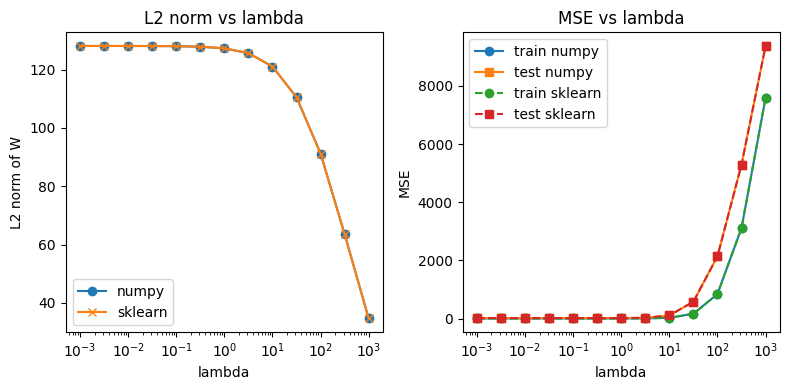

In [20]:
# scikit-learn 的 Ridge 回归对比
from sklearn.linear_model import Ridge

sk_l2 = []
sk_mse_train = []
sk_mse_test = []

for lam in lambdas:
    model = Ridge(alpha=lam, fit_intercept=False, solver='auto')
    model.fit(X_train, y_train)
    W_r = model.coef_

    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)

    mse_train = np.mean((y_train - y_train_hat) ** 2)
    mse_test = np.mean((y_test - y_test_hat) ** 2)
    l2 = np.linalg.norm(W_r, ord=2)

    sk_l2.append(l2)
    sk_mse_train.append(mse_train)
    sk_mse_test.append(mse_test)

    print(f"sklearn lambda={lam:.4g}: L2={l2:.6g}, MSE_train={mse_train:.6g}, MSE_test={mse_test:.6g}")

# 将 sklearn 曲线叠加在之前图上
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.semilogx(lambdas, l2_norms, marker='o', label='numpy')
plt.semilogx(lambdas, sk_l2, marker='x', label='sklearn')
plt.xlabel('lambda')
plt.ylabel('L2 norm of W')
plt.title('L2 norm vs lambda')
plt.legend()

plt.subplot(1,2,2)
plt.semilogx(lambdas, mse_train_list, marker='o', label='train numpy')
plt.semilogx(lambdas, mse_test_list, marker='s', label='test numpy')
plt.semilogx(lambdas, sk_mse_train, marker='o', linestyle='--', label='train sklearn')
plt.semilogx(lambdas, sk_mse_test, marker='s', linestyle='--', label='test sklearn')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs lambda')
plt.tight_layout()
plt.show()

## Lasso

Task: use scikit-learn’s Lasso to fit a Lasso-regression model with various values of $\lambda$ and no intercept, compute the L1 norm of the learned weights, report the mean squared error on both training and test data, and count the number of non-zero weights.

lasso lambda=0.001: L1=285.272, nnz=199, MSE_train=4.12569, MSE_test=18.7157
lasso lambda=0.003162: L1=283.278, nnz=194, MSE_train=4.13769, MSE_test=17.6386
lasso lambda=0.01: L1=278.245, nnz=184, MSE_train=4.21006, MSE_test=15.4694
lasso lambda=0.03162: L1=268.402, nnz=154, MSE_train=4.60638, MSE_test=12.2847
lasso lambda=0.1: L1=254.524, nnz=88, MSE_train=6.259, MSE_test=9.6713
lasso lambda=0.3162: L1=246.796, nnz=11, MSE_train=8.81832, MSE_test=8.96352
lasso lambda=1: L1=243.211, nnz=5, MSE_train=13.3627, MSE_test=12.2386
lasso lambda=3.162: L1=232.918, nnz=4, MSE_train=56.1514, MSE_test=47.3184
lasso lambda=10: L1=205.763, nnz=4, MSE_train=413.568, MSE_test=344.628
lasso lambda=31.62: L1=119.893, nnz=4, MSE_train=3987.73, MSE_test=3386.77
lasso lambda=100: L1=0, nnz=0, MSE_train=16480.1, MSE_test=15233.7
lasso lambda=316.2: L1=0, nnz=0, MSE_train=16480.1, MSE_test=15233.7
lasso lambda=1000: L1=0, nnz=0, MSE_train=16480.1, MSE_test=15233.7


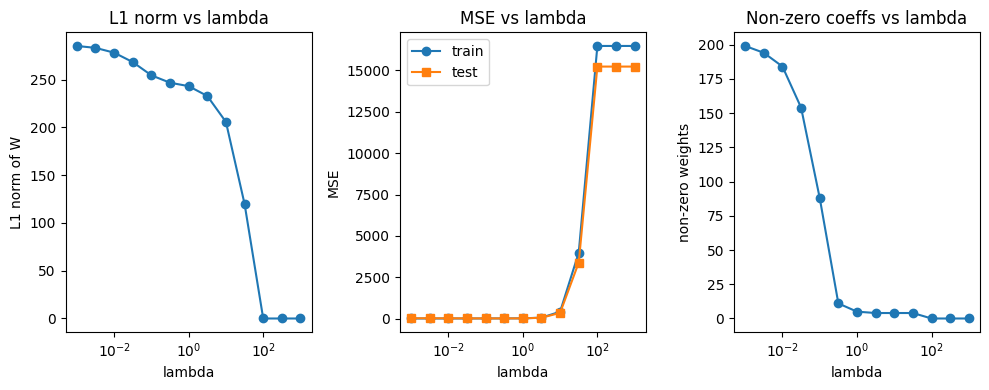

In [21]:
# scikit-learn 的 Lasso 回归
from sklearn.linear_model import Lasso

lasso_l1 = []
lasso_mse_train = []
lasso_mse_test = []
lasso_nnz = []

for lam in lambdas:
    # Lasso 的 alpha 对应问题中的 lambda
    model = Lasso(alpha=lam, fit_intercept=False, max_iter=10000)
    model.fit(X_train, y_train)
    W_l = model.coef_

    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)

    mse_train = np.mean((y_train - y_train_hat) ** 2)
    mse_test = np.mean((y_test - y_test_hat) ** 2)
    l1 = np.linalg.norm(W_l, ord=1)
    nnz = np.count_nonzero(np.abs(W_l) > 1e-8)

    lasso_l1.append(l1)
    lasso_mse_train.append(mse_train)
    lasso_mse_test.append(mse_test)
    lasso_nnz.append(nnz)

    print(f"lasso lambda={lam:.4g}: L1={l1:.6g}, nnz={nnz}, MSE_train={mse_train:.6g}, MSE_test={mse_test:.6g}")

# 绘图对比
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.semilogx(lambdas, lasso_l1, marker='o')
plt.xlabel('lambda')
plt.ylabel('L1 norm of W')
plt.title('L1 norm vs lambda')

plt.subplot(1,3,2)
plt.semilogx(lambdas, lasso_mse_train, marker='o', label='train')
plt.semilogx(lambdas, lasso_mse_test, marker='s', label='test')
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs lambda')

plt.subplot(1,3,3)
plt.semilogx(lambdas, lasso_nnz, marker='o')
plt.xlabel('lambda')
plt.ylabel('non-zero weights')
plt.title('Non-zero coeffs vs lambda')

plt.tight_layout()
plt.show()